<a href="https://colab.research.google.com/github/i2mmmmm/kaggle_flood/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Kaggle --upgrade

In [2]:
import os
os.environ['KAGGLE_USERNAME']='mmmmmlee'
os.environ['KAGGLE_KEY']='b4527f98e27813c6dae3fb199096dcb5'

In [10]:
!kaggle competitions download -c playground-series-s4e9

 77% 6.00M/7.84M [00:00<00:00, 60.5MB/s]
100% 7.84M/7.84M [00:00<00:00, 73.8MB/s]


In [12]:
!unzip 'playground-series-s4e9.zip'

Archive:  playground-series-s4e9.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [14]:
train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [18]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None
                  id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.3878

In [23]:
col = train.columns

for i in col:
    print(train[i].nunique())

188533
57
1897
34
6651
7
1117
52
319
156
2
1
1569
1569


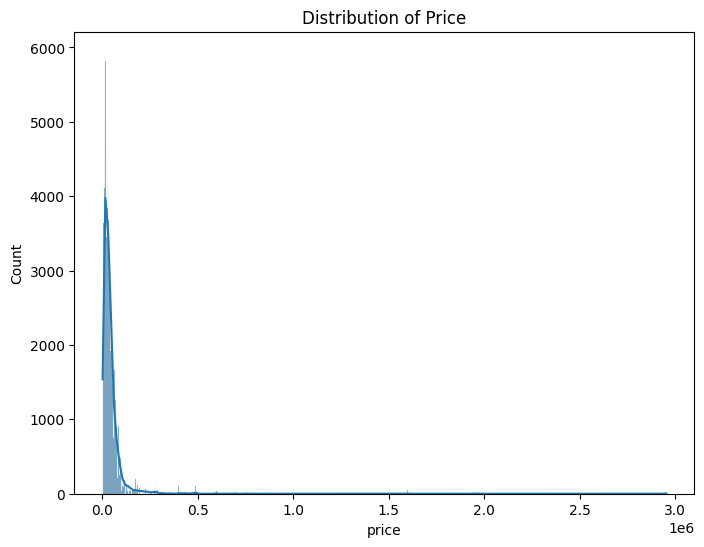

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(train['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

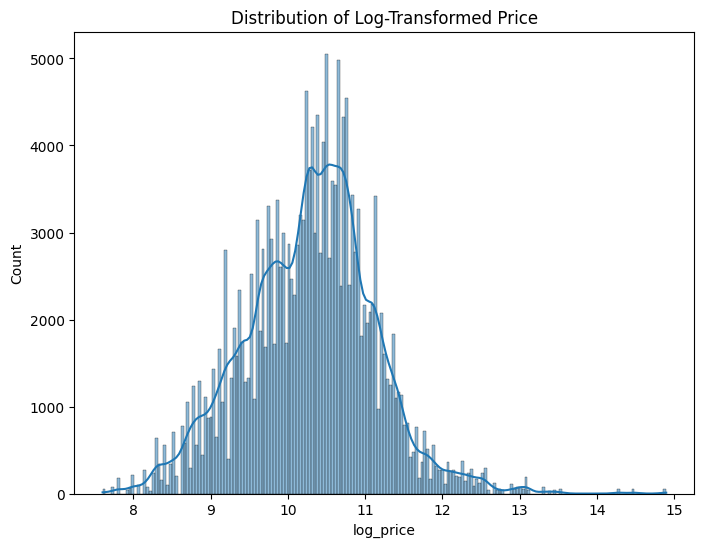

In [20]:
# 치우친 값을 확인하여, 로그 변환 진행
train['log_price'] = np.log1p(train['price'])  # log1p는 log(1 + x)를 적용하여 0인 값을 처리
plt.figure(figsize=(8, 6))
sns.histplot(train['log_price'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()

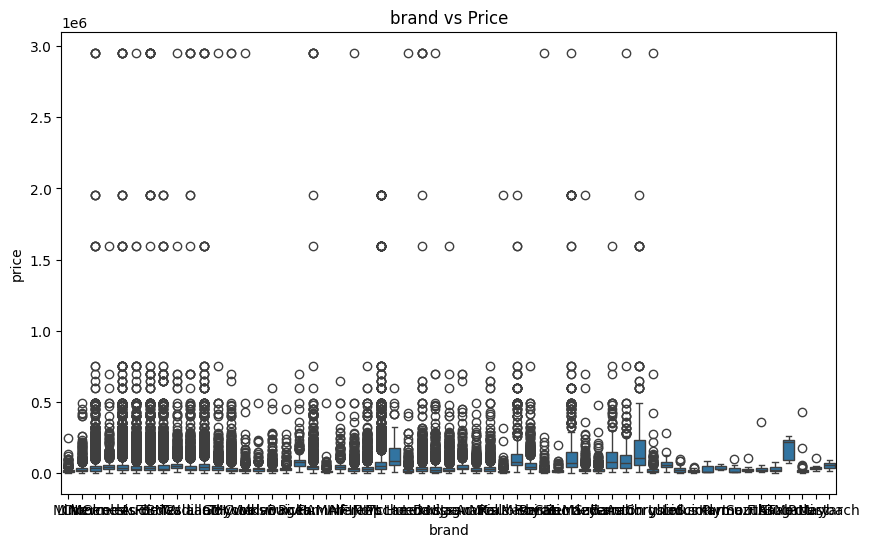

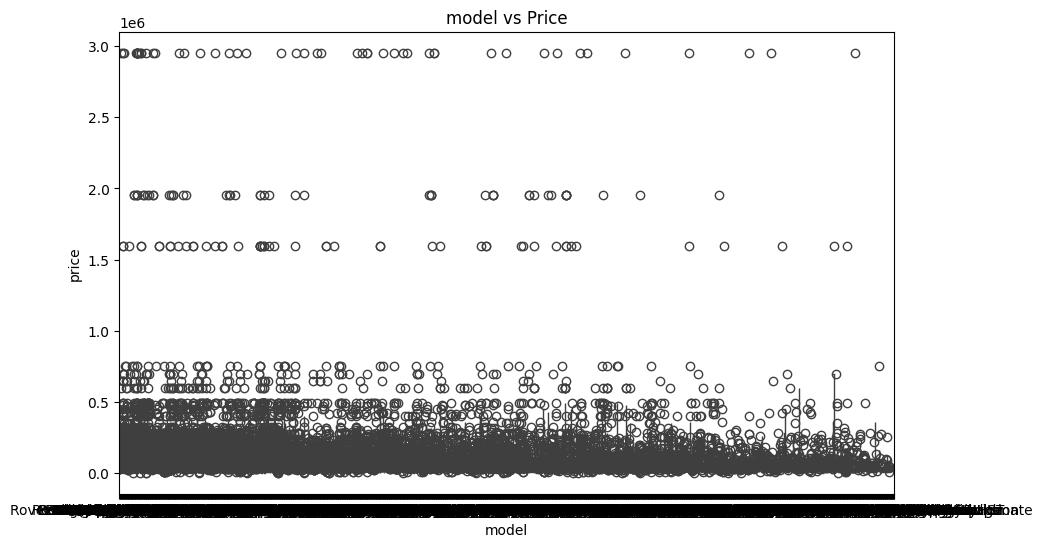

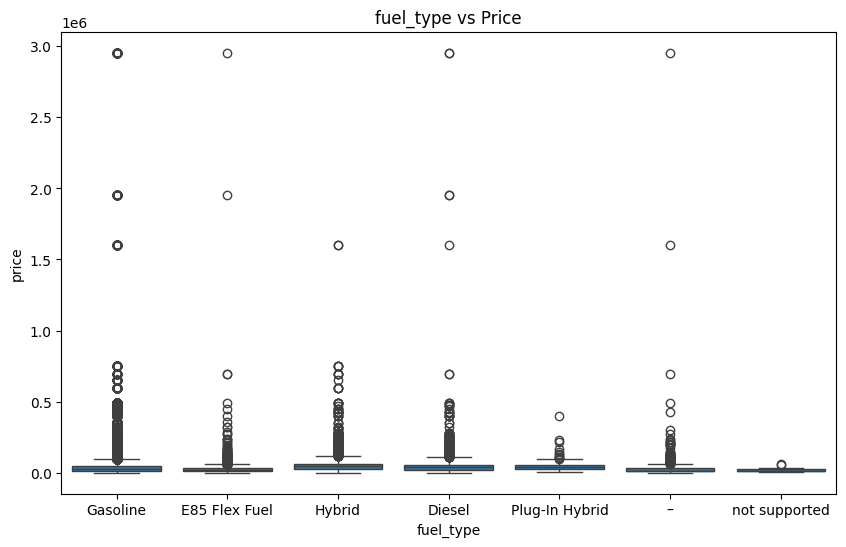

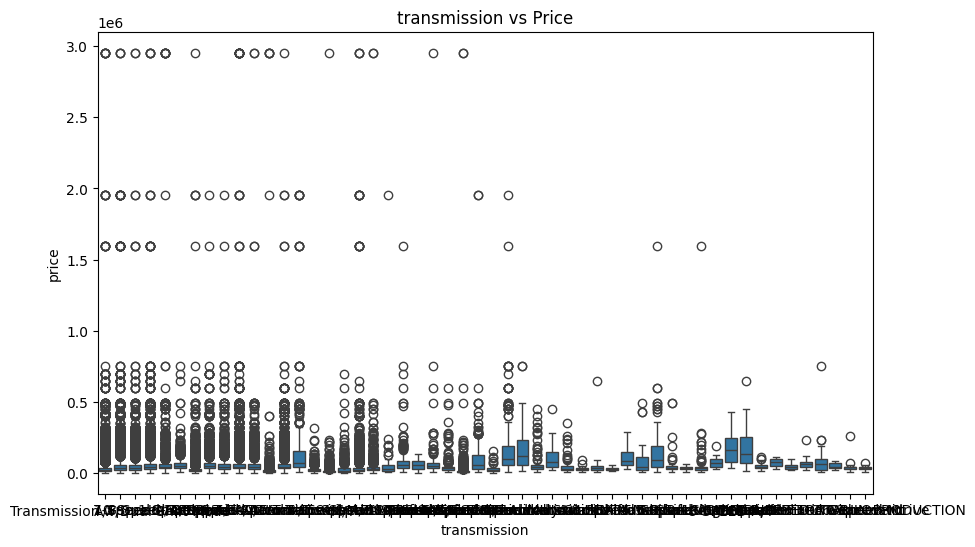

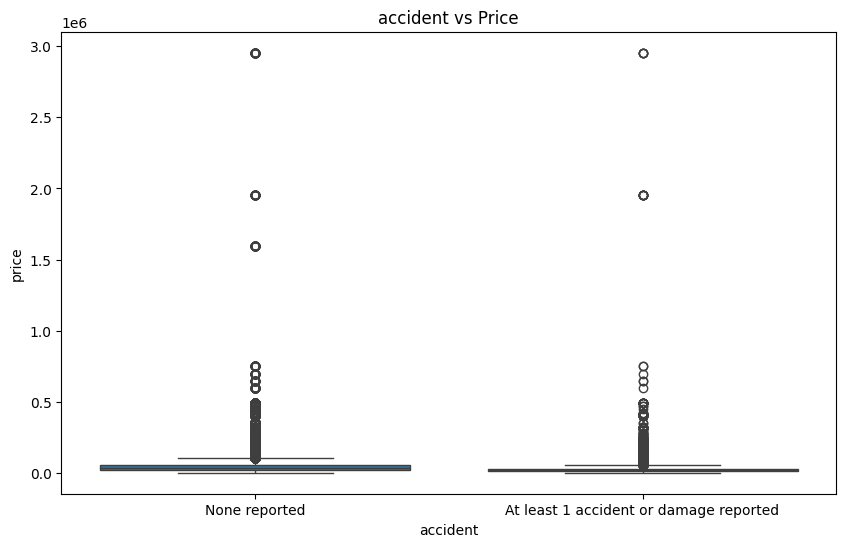

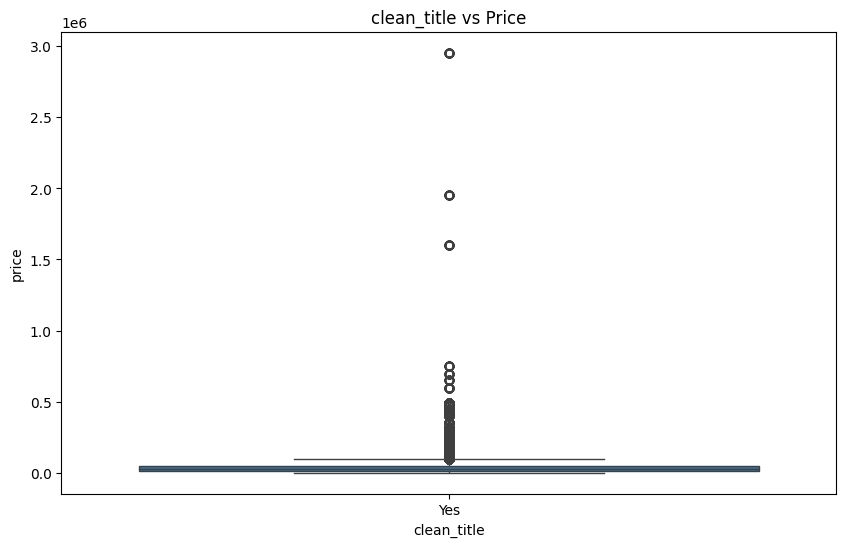

In [21]:
# 범주형
categorical_columns = ['brand', 'model', 'fuel_type', 'transmission', 'accident', 'clean_title']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[column], y=train['price'])
    plt.title(f'{column} vs Price')
    plt.show()

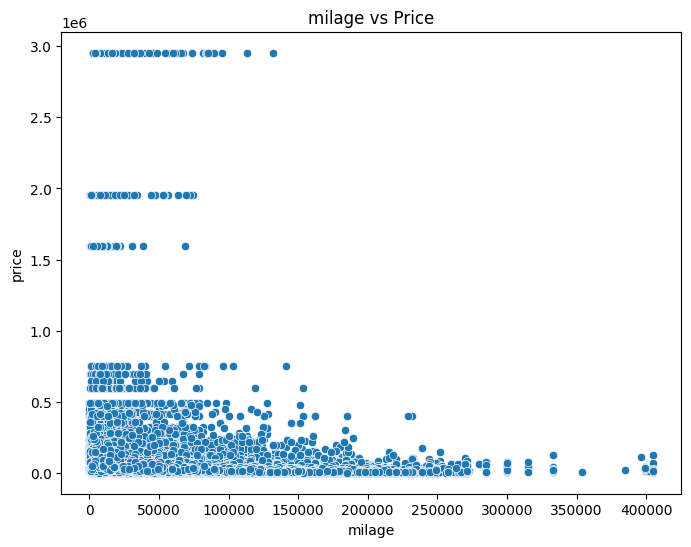

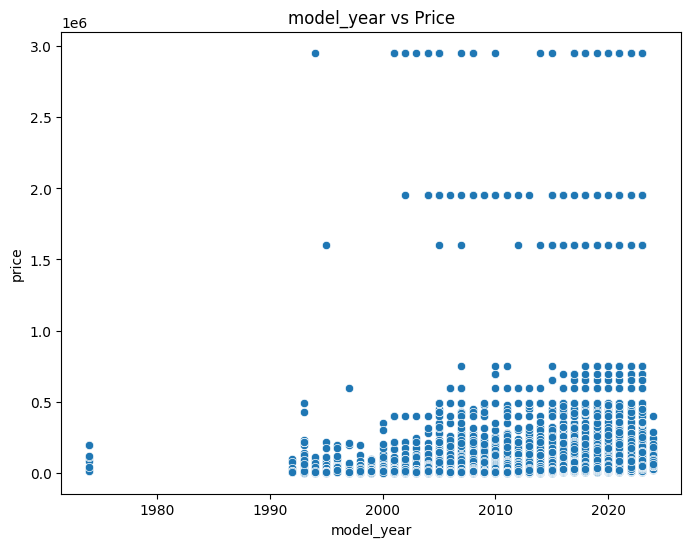

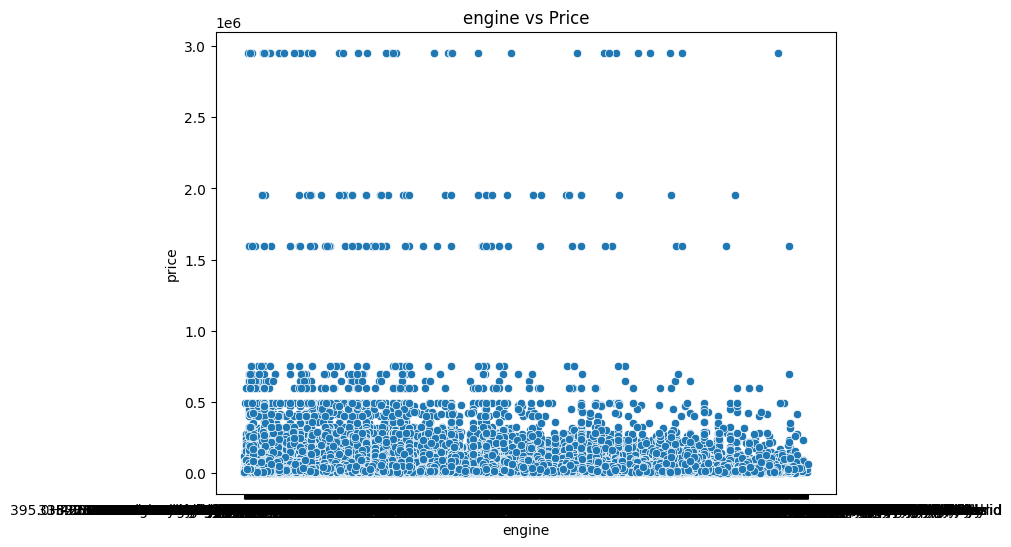

ValueError: could not convert string to float: '172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'

<Figure size 1000x800 with 0 Axes>

In [22]:
# 연속형
continuous_columns = ['milage', 'model_year', 'engine']

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train[column], y=train['price'])
    plt.title(f'{column} vs Price')
    plt.show()

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(train[continuous_columns + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()